In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
df_i = pd.read_csv("https://raw.githubusercontent.com/marisapiscitelli/MDA-620-Capstone/main/social%20media%20influencers-instagram%20-%20-nov%202022.csv")
df_y = pd.read_csv("https://raw.githubusercontent.com/marisapiscitelli/MDA-620-Capstone/main/social%20media%20influencers-youtube%20-%20--nov%202022.csv")

In [11]:
df_i.head(2)

#instagram dataset

,Unnamed: 0,Name,Instagram Name,Category,Followers,Audience Country,Eng. (Auth.),Eng. (Avg.)
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M
1,2,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M


In [12]:
df_y.head(2)

#instagram dataset

,Unnamed: 0,Youtube channel,youtuber name,Category,Subscribers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN


In [13]:
df_i.isnull().sum()

Unnamed: 0           0
Name                 0
Instagram Name      22
Category            48
Followers            0
Audience Country     4
Eng. (Auth.)         0
Eng. (Avg.)          0
dtype: int64

In [14]:
df_y.isnull().sum()

Unnamed: 0           0
Youtube channel      0
youtuber name        0
Category           293
Subscribers          0
Country            171
\nViews (Avg.)       0
Likes (Avg.)         0
Comments (Avg.)      0
Category-2         727
dtype: int64

In [16]:
df_i.drop_duplicates(subset=['Instagram Name'],inplace=True)

In [17]:
df_i.shape

(976, 8)

In [18]:
df_i.drop(labels=['Instagram Name','Eng. (Auth.)'],axis=1,inplace=True)

In [19]:
df_i.head(2)

,Unnamed: 0,Name,Category,Followers,Audience Country,Eng. (Avg.)
0,1,cristiano,Sports with a ball,483.1M,India,5.6M
1,2,kyliejenner,Fashion,370M,United States,4.4M


In [56]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [57]:
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df

In [58]:
li=['Followers','Eng. (Avg.)']

In [59]:
change(df_i,li)

,Unnamed: 0,Name,Category,Followers,Audience Country,Eng. (Avg.),newFollowers,newEng. (Avg.)
0,1,cristiano,Sports with a ball,483.1M,India,5.6M,483100000.0,5600000.0
1,2,kyliejenner,Fashion,370M,United States,4.4M,370000000.0,4400000.0
2,3,leomessi,Sports with a ball,357.8M,Indonesia,4.1M,357800000.0,4100000.0
3,4,arianagrande,Music,331.6M,United States,4M,331600000.0,4000000.0
4,5,zendaya,Cinema & Actors/actresses,152.2M,United States,6.5M,152200000.0,6500000.0
...,...,...,...,...,...,...,...,...
995,996,thenewclassic,Music,16.7M,United States,132.8K,16700000.0,132800.0
996,997,min.nicha,Lifestyle,4.2M,Thailand,526.6K,4200000.0,526600.0
997,998,francety,Adult content,11.4M,India,196.6K,11400000.0,196600.0
998,999,silambarasantrofficial,Shows,10.2M,India,216.6K,10200000.0,216600.0


In [63]:
df_i['Engagement Rate']=np.round((df_i['newEng. (Avg.)']/df_i['newFollowers'])*100,3)

In [64]:
print(df_i['Followers'].str[-1].unique())

['M']


In [65]:
# for convenience 
df_i['newFollowers']=df_i['newFollowers']/1000000

In [67]:
df_i.drop(labels=['Eng. (Avg.)','newEng. (Avg.)'],axis=1,inplace=True)

In [68]:
df_i.head(5)

,Unnamed: 0,Name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,1,cristiano,Sports with a ball,483.1M,India,483.1,1.159
1,2,kyliejenner,Fashion,370M,United States,370.0,1.189
2,3,leomessi,Sports with a ball,357.8M,Indonesia,357.8,1.146
3,4,arianagrande,Music,331.6M,United States,331.6,1.206
4,5,zendaya,Cinema & Actors/actresses,152.2M,United States,152.2,4.271


In [69]:
df_i.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,Unnamed: 0,Name,Followers,Engagement Rate
0,32,instagram,549.3M,0.066
1,1,cristiano,483.1M,1.159
2,2,kyliejenner,370M,1.189
3,3,leomessi,357.8M,1.146
4,7,selenagomez,347.6M,0.662
5,36,therock,338.1M,0.137
6,4,arianagrande,331.6M,1.206
7,24,kimkardashian,330.3M,0.244
8,11,beyonce,275.7M,0.798
9,39,khloekardashian,272M,0.180


<AxesSubplot:title={'center':'Top 15 most followed celebrities on instagram'}, xlabel='newFollowers', ylabel='Name'>

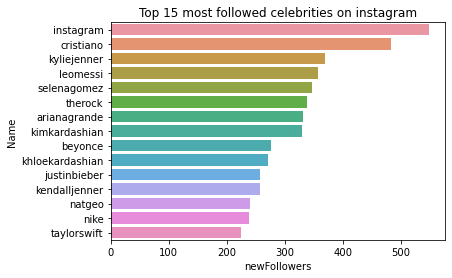

In [71]:
plt.title('Top 15 most followed celebrities on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='Name',x='newFollowers',data=df_i.sort_values(by='newFollowers',ascending=False).head(15))

In [75]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [76]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

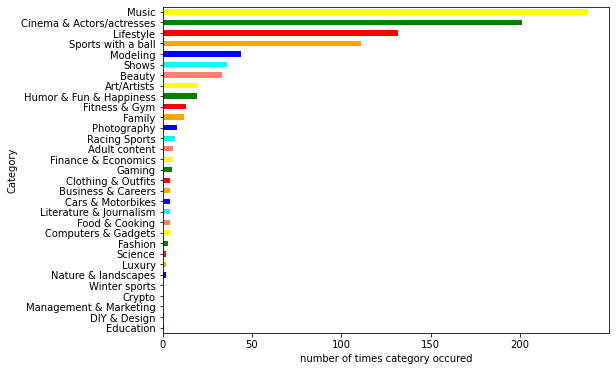

In [77]:
plot(df_i)

In [79]:
df_y.drop_duplicates(subset=['Youtube channel'],inplace=True)

In [90]:
pallete=['cyan','blue','orange','red','green','yellow','salmon']

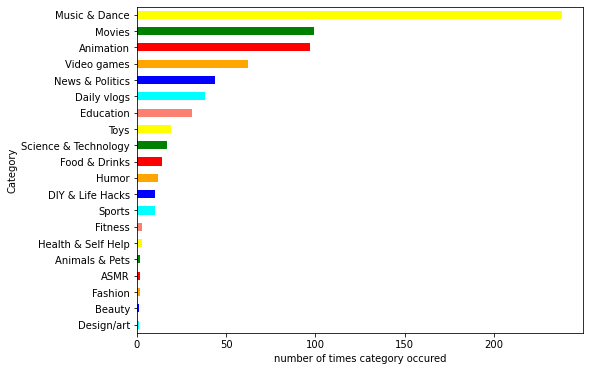

In [91]:
plot(df_y)

In [92]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

In [93]:
#plot_c(df_i)

In [94]:
#plot_c(df_y)

In [101]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

<AxesSubplot:>

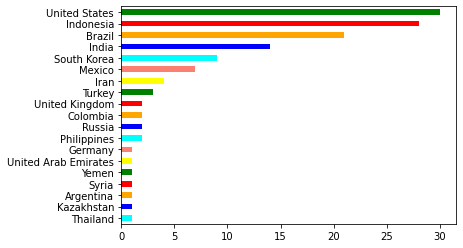

In [102]:
demand(df_i,'Lifestyle')

In [104]:
df_y.iloc[0:10,[1,2,3]]

,Youtube channel,youtuber name,Category
0,tseries,T-Series,Music & Dance
1,checkgate,Cocomelon - Nursery Rhymes,Education
2,PewDiePie,PewDiePie,Animation
3,MrBeast6000,MrBeast,Video games
4,✿ Kids Diana Show,✿ Kids Diana Show,Animation
5,Like Nastya,Like Nastya,Toys
6,WWEFanNation,WWE,Video games
7,zeemusiccompany,Zee Music Company,Music & Dance
8,Vlad and Niki,Vlad and Niki,Animation
9,BLACKPINK,BLACKPINK,Music & Dance


In [105]:
ly=['Followers','avg views', 'avg likes', 'avg comments']

In [106]:
df_i['newFollowers'].describe()

count    976.000000
mean      27.060758
std       45.745292
min        1.900000
25%        9.000000
50%       15.000000
75%       26.825000
max      549.300000
Name: newFollowers, dtype: float64

In [107]:
df_i['newFollowers'].quantile(0.94)

65.55

In [108]:
df_i.head(2)

,Unnamed: 0,Name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,1,cristiano,Sports with a ball,483.1M,India,483.1,1.159
1,2,kyliejenner,Fashion,370M,United States,370.0,1.189


In [141]:
def for_mini_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<66]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[1,3,-1]]

In [142]:
for_mini_followers_instagram('United States','Music')

,Name,Followers,Engagement Rate
15,jin,40M,22.250
383,hshq,6.7M,17.910
439,barbieferreira,6.2M,17.742
870,arcticmonkeys,4.1M,15.949
26,badbunnypr,43.1M,12.993
...,...,...,...
206,ladygaga,53.2M,0.581
349,teddysphotos,40.5M,0.523
520,nickjonas,33.2M,0.492
397,britneyspears,42.1M,0.433


In [143]:
def for_mega_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>66]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[1,3,-1]]

In [144]:
for_mega_followers_instagram('United States','Music')

,Name,Followers,Engagement Rate
11,billieeilish,106.3M,4.704
40,dualipa,87M,1.609
22,iamcardib,140.8M,1.349
3,arianagrande,331.6M,1.206
34,champagnepapi,121.1M,1.156
10,beyonce,275.7M,0.798
6,selenagomez,347.6M,0.662
28,jlo,221.6M,0.451
75,ddlovato,139.5M,0.295
55,nickiminaj,200.9M,0.199


In [124]:
# category(df_i,'Sports with a ball')

In [145]:
for_mini_followers_instagram('United States','Sports with a ball')

,Name,Followers,Engagement Rate
527,klaythompson,13.5M,2.884
710,brfootball,12.6M,2.207
486,obj,16.5M,2.145
858,ab,11.3M,2.134
792,giannis_an34,13.5M,1.670
867,zo,14.7M,1.239
592,lakers,20.3M,1.073
787,kyrieirving,17.3M,1.023
676,bleacherreport,19.6M,0.961
347,houseofhighlights,36.1M,0.660


In [146]:
for_mega_followers_instagram('United States','Sports with a ball')

,Name,Followers,Engagement Rate
36,kingjames,133M,0.827
418,nba,70.9M,0.142


In [147]:
df_y.head(3)

,Unnamed: 0,Youtube channel,youtuber name,Category,Subscribers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN
2,3,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN


In [148]:
df_y.isnull().sum()

Unnamed: 0           0
Youtube channel      0
youtuber name        0
Category           293
Subscribers          0
Country            171
\nViews (Avg.)       0
Likes (Avg.)         0
Comments (Avg.)      0
Category-2         727
dtype: int64

In [149]:
df_y.dropna(axis=0,how='any',subset=['Likes (Avg.)','Comments (Avg.)']).isnull().sum()

Unnamed: 0           0
Youtube channel      0
youtuber name        0
Category           293
Subscribers          0
Country            171
\nViews (Avg.)       0
Likes (Avg.)         0
Comments (Avg.)      0
Category-2         727
dtype: int64

In [156]:
df_y.dropna(axis=0,how='any',subset=['Likes (Avg.)','Comments (Avg.)'],inplace=True)

In [172]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [208]:
def change(df,list1):
    for y in list1:
        df['new'+y]=df[y].apply(convert)
        df['new'+y]=df['new'+y].apply(lambda x: "".join(x))
        df['new'+y]=pd.to_numeric(df['new'+y])
        df['new'+y]=np.where(['M' in j for j in df[y]],df['new'+y]*1000000,
                             np.where(['K' in j1 for j1 in df[y]],df['new'+y]*1000,df['new'+y]))
    return df

In [209]:
ly=['Subscribers','Likes (Avg.)','Comments (Avg.)', '\nViews (Avg.)']

In [210]:
change(df_y,ly)

,Unnamed: 0,Youtube channel,youtuber name,Category,Subscribers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,newSubscribers,newLikes (Avg.),newComments (Avg.),new\nViews (Avg.)
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,229500000.0,2800.0,158.0,103800.0
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,146600000.0,48300.0,0.0,9500000.0
2,3,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,111600000.0,110700.0,7800.0,1400000.0
3,4,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,109100000.0,3100000.0,56700.0,38400000.0
4,5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102.5M,NaN,2.4M,15.7K,0,Toys,102500000.0,15700.0,0.0,2400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,RUOK,RUOK,NaN,10.1M,Brazil,215.4K,25.2K,1.3K,NaN,10100000.0,25200.0,1300.0,215400.0
996,997,FoxNewsChannel,Fox News,News & Politics,10.1M,United States,98.4K,4K,884,NaN,10100000.0,4000.0,884.0,98400.0
997,998,SULE PRODUCTIONS,SULE PRODUCTIONS,NaN,10.1M,Indonesia,218.3K,4.5K,306,NaN,10100000.0,4500.0,306.0,218300.0
998,999,MBCkpop,MBCkpop,Music & Dance,10.1M,Malaysia,19.7K,2.6K,92,NaN,10100000.0,2600.0,92.0,19700.0


In [211]:
#df_y[df_y['Audience Country']=='Spain']['Category'].value_counts()

In [212]:
#df_y[df_y['Audience Country']=='Brazil'].groupby('Category').get_group('Animation')

In [214]:
df_y['Engagement rate']=round(((df_y['newComments (Avg.)']+df_y['newLikes (Avg.)']+df_y['new\nViews (Avg.)'])/df_y['newSubscribers'])*100,3)

In [215]:
df_y.head(2)

,Unnamed: 0,Youtube channel,youtuber name,Category,Subscribers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,newSubscribers,newLikes (Avg.),newComments (Avg.),new\nViews (Avg.),Engagement rate
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,229500000.0,2800.0,158.0,103800.0,0.047
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,146600000.0,48300.0,0.0,9500000.0,6.513


In [216]:
df_y.columns

Index(['Unnamed: 0', 'Youtube channel', 'youtuber name', 'Category',
       'Subscribers', 'Country', '\nViews (Avg.)', 'Likes (Avg.)',
       'Comments (Avg.)', 'Category-2', 'newSubscribers', 'newLikes (Avg.)',
       'newComments (Avg.)', 'new\nViews (Avg.)', 'Engagement rate'],
      dtype='object')

In [218]:
# for convenience
df_y['newSubscribers']=df_y['newSubscribers']/1000000

In [219]:
df_y.drop(labels=['\nViews (Avg.)', 'Likes (Avg.)', 'Comments (Avg.)','new\nViews (Avg.)', 'newLikes (Avg.)', 'newComments (Avg.)',
       ],axis=1,inplace=True)

In [220]:
df_y['newSubscribers'].describe()

count    998.000000
mean      19.036774
std       14.478041
min       10.100000
25%       11.800000
50%       14.600000
75%       20.300000
max      229.500000
Name: newSubscribers, dtype: float64

In [222]:
df_y['newSubscribers'].quantile(0.90)

31.2

In [223]:
df_y.head(1)

,Unnamed: 0,Youtube channel,youtuber name,Category,Subscribers,Country,Category-2,newSubscribers,Engagement rate
0,1,tseries,T-Series,Music & Dance,229.5M,India,NaN,229.5,0.047


In [231]:
def for_mini_subscribers_youtube(coun,cat):
    df1=df_y[df_y['Country']==coun]
    df1_mini=df1[df1['newSubscribers']<=30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[1,3,-1]]
    

In [232]:
# df_y.groupby('Category')['Audience Country'].first()

In [233]:
for_mini_subscribers_youtube('United States','Music & Dance')

,Youtube channel,Category,Engagement rate
173,ChrisBrownTV,Music & Dance,88.006
580,jordanmatter,Music & Dance,36.681
139,DrakeOfficial,Music & Dance,25.424
317,farrukotv,Music & Dance,22.897
932,Juice WRLD,Music & Dance,21.453
...,...,...,...
413,DopeLyrics,Music & Dance,0.068
121,UltraRecords,Music & Dance,0.065
924,CJENMMUSIC,Music & Dance,0.059
592,AtlanticVideos,Music & Dance,0.059


In [234]:
def for_mega_subscribers_youtube(coun,cat):
    df1=df_y[df_y['Country']==coun]
    df1_mini=df1[df1['newSubscribers']>30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[1,3,-1]]

In [239]:
for_mega_subscribers_youtube('India','Movies')

,Youtube channel,Category,Engagement rate
62,AddictedA1,Movies,46.944
107,PowerKids,Movies,0.349
12,sabtv,Movies,0.063
